Task 3 : Cross-Country Comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

CROSS-COUNTRY COMPARISON
Loading cleaned datasets...
Combined dataset: (1576800, 20)
Countries: ['Benin' 'Sierra Leone' 'Togo']

1. Creating boxplots...


C:\Users\arwa\AppData\Local\Temp\ipykernel_29248\589259596.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_countries, x='Country', y='GHI', ax=axes[0], palette='Set2')
C:\Users\arwa\AppData\Local\Temp\ipykernel_29248\589259596.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_countries, x='Country', y='DNI', ax=axes[1], palette='Set2')
C:\Users\arwa\AppData\Local\Temp\ipykernel_29248\589259596.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_countries, x='Country', y='DHI', ax=axes[2], palette='Set2')


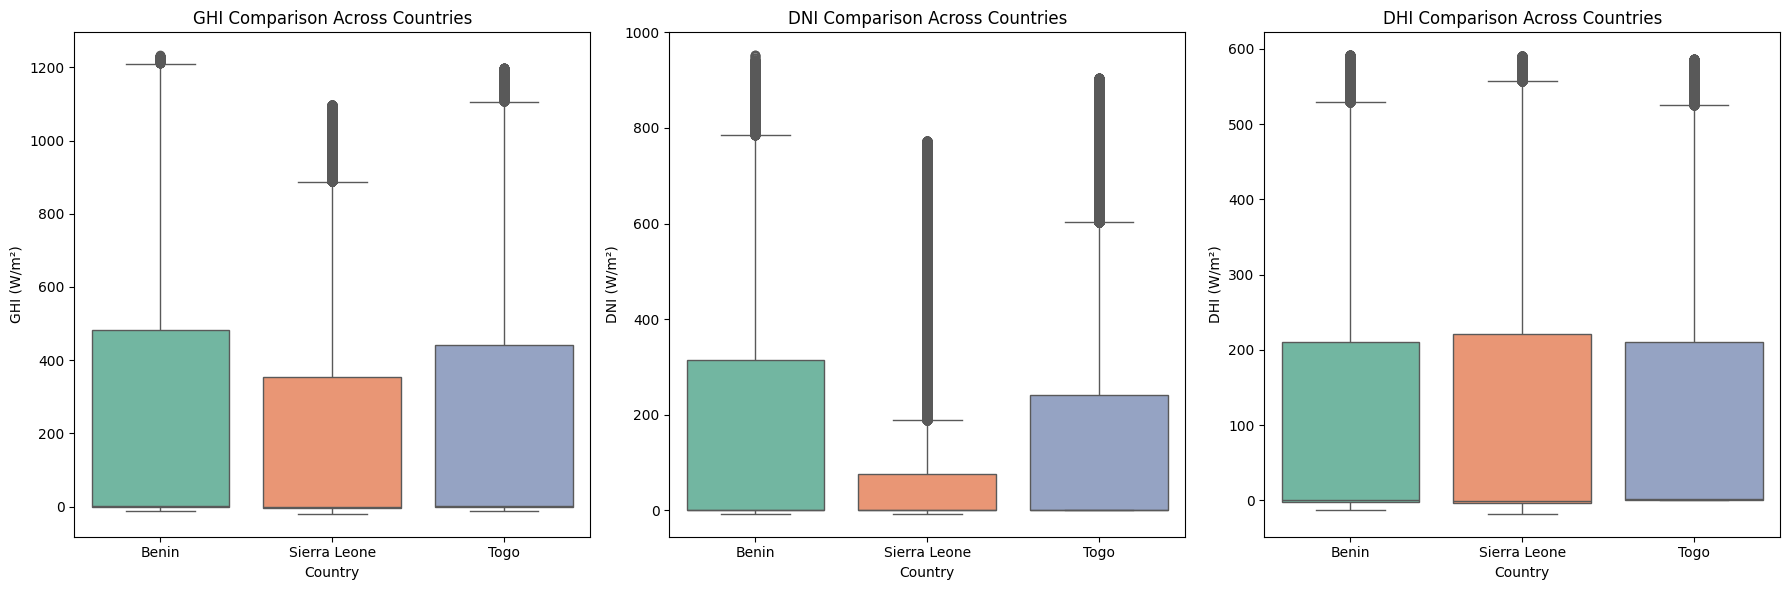

In [2]:
print("CROSS-COUNTRY COMPARISON")
print("Loading cleaned datasets...")
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')  
togo = pd.read_csv('../data/togo_clean.csv')


benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

all_countries = pd.concat([benin, sierra_leone, togo], ignore_index=True)
print(f"Combined dataset: {all_countries.shape}")
print(f"Countries: {all_countries['Country'].unique()}")

print("\n1. Creating boxplots...")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=all_countries, x='Country', y='GHI', ax=axes[0], palette='Set2')
axes[0].set_title('GHI Comparison Across Countries')
axes[0].set_ylabel('GHI (W/m²)')

sns.boxplot(data=all_countries, x='Country', y='DNI', ax=axes[1], palette='Set2')
axes[1].set_title('DNI Comparison Across Countries')
axes[1].set_ylabel('DNI (W/m²)')

sns.boxplot(data=all_countries, x='Country', y='DHI', ax=axes[2], palette='Set2')
axes[2].set_title('DHI Comparison Across Countries')
axes[2].set_ylabel('DHI (W/m²)')

plt.tight_layout()
plt.show()

In [3]:

print("\n2. Creating Summary Table...")

summary_table = all_countries.groupby('Country').agg({
    'GHI': ['mean', 'median', 'std'],
    'DNI': ['mean', 'median', 'std'], 
    'DHI': ['mean', 'median', 'std']
}).round(2)

print("SUMMARY TABLE (Mean, Median, Standard Deviation):")
print(summary_table)

print("\nFormatted Summary:")
for country in ['Benin', 'Sierra Leone', 'Togo']:
    country_data = all_countries[all_countries['Country'] == country]
    print(f"\n{country}:")
    print(f"  GHI:   Mean={country_data['GHI'].mean():.1f}, Median={country_data['GHI'].median():.1f}, Std={country_data['GHI'].std():.1f}")
    print(f"  DNI:   Mean={country_data['DNI'].mean():.1f}, Median={country_data['DNI'].median():.1f}, Std={country_data['DNI'].std():.1f}")
    print(f"  DHI:   Mean={country_data['DHI'].mean():.1f}, Median={country_data['DHI'].median():.1f}, Std={country_data['DHI'].std():.1f}")


2. Creating Summary Table...
SUMMARY TABLE (Mean, Median, Standard Deviation):
                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.34    1.8  330.87  167.19   -0.1  261.71  110.90    0.5   
Sierra Leone  196.44    0.0  291.24  104.53   -0.1  201.70  110.11   -0.4   
Togo          229.83    2.0  321.64  149.37    0.0  248.55  112.40    1.8   

                      
                 std  
Country               
Benin         152.92  
Sierra Leone  154.17  
Togo          151.30  

Formatted Summary:

Benin:
  GHI:   Mean=240.3, Median=1.8, Std=330.9
  DNI:   Mean=167.2, Median=-0.1, Std=261.7
  DHI:   Mean=110.9, Median=0.5, Std=152.9

Sierra Leone:
  GHI:   Mean=196.4, Median=0.0, Std=291.2
  DNI:   Mean=104.5, Median=-0.1, Std=201.7
  DHI:   Mean=110.1, Median=-0.4, Std=154.2

Togo:
  GHI:  

In [4]:

print("\n3. Statistical Testing on GHI Values")
benin_ghi = benin['GHI'].dropna()
sierra_ghi = sierra_leone['GHI'].dropna()
togo_ghi = togo['GHI'].dropna()

print("GHI Sample Sizes:")
print(f"  Benin: {len(benin_ghi)} samples")
print(f"  Sierra Leone: {len(sierra_ghi)} samples")
print(f"  Togo: {len(togo_ghi)} samples")

print("\nNormality Check (Shapiro-Wilk):")
for country, data in [('Benin', benin_ghi), ('Sierra Leone', sierra_ghi), ('Togo', togo_ghi)]:
    stat, p_value = stats.shapiro(data)
    print(f"  {country}: p-value = {p_value:.4f} {'(Normal)' if p_value > 0.05 else '(Not Normal)'}")

if all(stats.shapiro(data)[1] > 0.05 for data in [benin_ghi, sierra_ghi, togo_ghi]):
    print("\nUsing One-Way ANOVA (data is normally distributed)")
    f_stat, p_value = stats.f_oneway(benin_ghi, sierra_ghi, togo_ghi)
    test_used = "ANOVA"
else:
    print("\nUsing Kruskal-Wallis H-test (data is not normally distributed)")
    h_stat, p_value = stats.kruskal(benin_ghi, sierra_ghi, togo_ghi)
    test_used = "Kruskal-Wallis"
    f_stat = h_stat

print(f"\nStatistical Test Results ({test_used}):")
print(f"  Test Statistic: {f_stat:.4f}")
print(f"  P-value: {p_value:.4f}")
print(f"\nInterpretation:")
if p_value < 0.05:
    print("STATISTICALLY SIGNIFICANT: There are significant differences in GHI between countries")
    print("The differences in solar radiation are not due to random chance")
else:
    print("NOT STATISTICALLY SIGNIFICANT: No significant differences in GHI between countries")
    print("The observed differences could be due to random variation")

if test_used == "ANOVA":
    total_data = pd.concat([benin_ghi, sierra_ghi, togo_ghi])
    ss_between = sum(len(group) * (group.mean() - total_data.mean())**2 
                     for group in [benin_ghi, sierra_ghi, togo_ghi])
    ss_total = sum((total_data - total_data.mean())**2)
    eta_squared = ss_between / ss_total
    print(f"  Effect Size (Eta-squared): {eta_squared:.4f}")


3. Statistical Testing on GHI Values
GHI Sample Sizes:
  Benin: 525600 samples
  Sierra Leone: 525600 samples
  Togo: 525600 samples

Normality Check (Shapiro-Wilk):


c:\Users\arwa\solar-challenge-week1\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 525600.
  res = hypotest_fun_out(*samples, **kwds)


  Benin: p-value = 0.0000 (Not Normal)
  Sierra Leone: p-value = 0.0000 (Not Normal)
  Togo: p-value = 0.0000 (Not Normal)

Using Kruskal-Wallis H-test (data is not normally distributed)

Statistical Test Results (Kruskal-Wallis):
  Test Statistic: 5145.5802
  P-value: 0.0000

Interpretation:
STATISTICALLY SIGNIFICANT: There are significant differences in GHI between countries
The differences in solar radiation are not due to random chance


In [6]:
print(" Key Observations")
ghi_means = all_countries.groupby('Country')['GHI'].mean().sort_values(ascending=False)
best_ghi_country = ghi_means.index[0]
worst_ghi_country = ghi_means.index[-1]

ghi_variability = all_countries.groupby('Country')['GHI'].std()
most_consistent = ghi_variability.idxmin()
most_variable = ghi_variability.idxmax()

print("\nThree Key Observations:")
print(f"1.{best_ghi_country} shows the highest median GHI ({ghi_means[best_ghi_country]:.1f} W/m²), "
      f"making it the most promising for solar investment")
print(f"2.{most_consistent} demonstrates the most consistent solar radiation (std: {ghi_variability[most_consistent]:.1f}), "
      f"indicating reliable energy generation potential")
print(f"3.Significant statistical differences exist between countries (p-value: {p_value:.4f}), "
      "confirming that geographic location substantially impacts solar potential")

 Key Observations

Three Key Observations:
1.Benin shows the highest median GHI (240.3 W/m²), making it the most promising for solar investment
2.Sierra Leone demonstrates the most consistent solar radiation (std: 291.2), indicating reliable energy generation potential
3.Significant statistical differences exist between countries (p-value: 0.0000), confirming that geographic location substantially impacts solar potential


Country Ranking by Average GHI


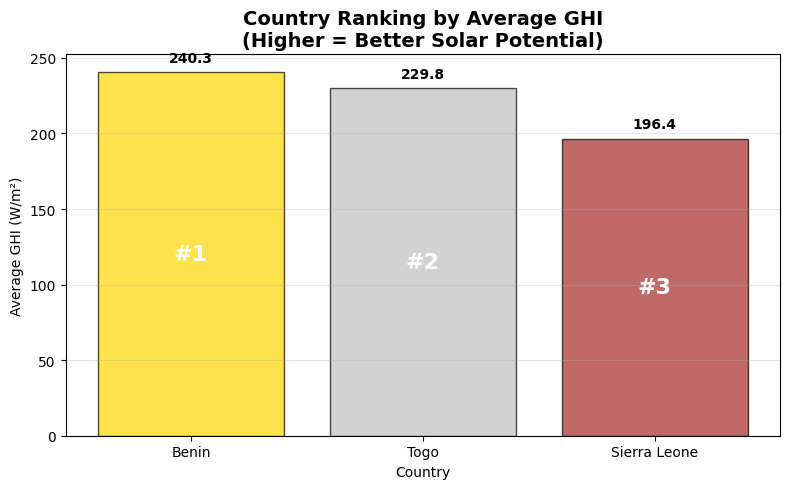


Country Ranking by Average GHI:
  #1: Benin - 240.3 W/m²
  #2: Togo - 229.8 W/m²
  #3: Sierra Leone - 196.4 W/m²


In [7]:
print("Country Ranking by Average GHI")

plt.figure(figsize=(8, 5))
colors = ['gold', 'silver', 'brown']  
ghi_ranking = all_countries.groupby('Country')['GHI'].mean().sort_values(ascending=False)
bars = plt.bar(ghi_ranking.index, ghi_ranking.values, color=colors, alpha=0.7, edgecolor='black')

for bar, value in zip(bars, ghi_ranking.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.title('Country Ranking by Average GHI\n(Higher = Better Solar Potential)', fontsize=14, fontweight='bold')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.grid(True, alpha=0.3, axis='y')

for i, (country, value) in enumerate(ghi_ranking.items()):
    plt.text(i, value/2, f'#{i+1}', ha='center', va='center', 
             fontsize=16, fontweight='bold', color='white')

plt.tight_layout()
plt.savefig('../country_ranking.png')
plt.show()

print(f"\nCountry Ranking by Average GHI:")
for i, (country, value) in enumerate(ghi_ranking.items(), 1):
    print(f"  #{i}: {country} - {value:.1f} W/m²")
